# Capstone Project 1

## Background

One of the most debatable questions in the field of Finance is whether it is an Art or Science. We have heard of many individuals who become millionaire from the stock market. Some argue that they are “able to tell” which stocks would increase in value (Art) while others insist that the stock market is purely numbers based calculation (Science). 

Since I myself are not one of those people that can predict the movement of the stock prices, I would use Science to predict the movement using different statistical approaches. This project will aim to create an algorithm that will predict the stock price.

There are different ways to predict the stock prices such as:
- Moving Average
- Linear Regression
- Auto ARIMA
- Prophet
- Long Short Term Memory (LSTM)
	
From the statistical method above, I would like to test which one is able to predict the best movement by comparing it day-per-day once the algorithm is done for 3 months while feeding the news to the algorithm as well.

## Data Source

The data source that I will be using is from Alpha Vantage API and for this storytelling project I will focus solely on Disney company. There is a 20-years limitation on the data that is be sourced from Alpha Vantage. Thus, I am planning to start by January 1, 2000 and try to predict the future prices starting January 1, 2020. In the event that they predictions are way off, I will try to use more datapoints.

## Data Cleaning

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
from datetime import date
from alpha_vantage.timeseries import TimeSeries
from dateutil.relativedelta import relativedelta
import math
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
# Declaring the API Key

#av_api_key = ''

# I won't be using Twitter for now
#twitter_api_key = 'jzu3E5CJbVcjziMmJhpMfwBjx'

In [4]:
# Use the TimeSeries to declare the API key and output format to pandas

ts = TimeSeries(key=av_api_key,output_format='pandas')

In [5]:
# Pull the Dow Jones Industrial standard to check the data

dji_data, metadata = ts.get_daily(symbol="DJI", outputsize='full')
dji_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5079.000000,5079.000000,5079.000000,5079.000000,5.079000e+03
mean,14172.168976,14253.443069,14086.807921,14174.295907,2.205767e+08
std,5353.687157,5364.652350,5339.998103,5353.403918,1.048882e+08
min,6547.009800,6709.609900,6469.950200,6547.049800,8.410000e+06
25%,10424.750000,10487.480000,10363.685100,10424.830050,1.451050e+08
50%,12147.379900,12234.669900,12076.929700,12151.410200,2.155100e+08
75%,17131.360350,17200.349600,17059.130850,17134.665050,2.736800e+08
max,29440.470700,29568.570300,29406.750000,29551.419900,2.190810e+09


In [6]:
# Check the data types

#dji_data.dtypes

In [7]:
# Check if any missing values in any of the columns

#dji_data.isna().sum()

In [8]:
#dji_data.nunique()

In [9]:
# Declare the columns name to be used

columns_name = ['Open', 'High', 'Low', 'Close', 'Volume']

In [10]:
# Create a function to pull the data

def get_data(company_symbol):
    data, metadata = ts.get_daily(symbol = company_symbol, outputsize='full')
    data.columns = columns_name
    data.reset_index(level=0, inplace=True)
    data['days_since'] = (data['date'] - min(data['date']) ).astype('timedelta64[D]')
    return data

## Data Storytelling

### Disney

Disney was founded in 1923 and will be celebring its 100th year anniversary in less than 4 years in 2023. It was started by Walt Disney and his brother Roy Disney.

Disney has 2 public offerings during the course of 96 years. The first one is in 1940 and the second one is in 1957.

In [11]:
# Use the function to get the Disney data

dis_data = get_data("DIS")
dis_data.to_csv("Disney " + str(date.today()) + ".csv")

In [12]:
#dis_data = pd.read_csv("Disney 2019-12-17.csv")

In [13]:
dis_data.head()

,date,Open,High,Low,Close,Volume,days_since
0,2000-03-10,35.50,35.75,34.69,35.13,7064100.0,0.0
1,2000-03-13,33.13,35.50,33.00,34.94,5249000.0,3.0
2,2000-03-14,34.75,34.75,33.81,34.13,5591200.0,4.0
3,2000-03-15,34.00,34.94,33.63,34.81,6645000.0,5.0
4,2000-03-16,35.00,35.50,33.75,35.31,8337700.0,6.0


In [14]:
#dis_data = dis_data.drop(columns='Unnamed: 0')
#dis_data = dis_data.rename(columns={"date_info": "date"})

In [15]:
pearsoncorr = dis_data.corr(method='pearson')
pearsoncorr

,Open,High,Low,Close,Volume,days_since
Open,1.000000,0.999901,0.999887,0.999802,-0.110494,0.878859
High,0.999901,1.000000,0.999847,0.999903,-0.106954,0.878549
Low,0.999887,0.999847,1.000000,0.999898,-0.114690,0.879559
Close,0.999802,0.999903,0.999898,1.000000,-0.110592,0.879032
Volume,-0.110494,-0.106954,-0.114690,-0.110592,1.000000,0.040799
days_since,0.878859,0.878549,0.879559,0.879032,0.040799,1.000000


In [16]:
dis_data.describe()

,Open,High,Low,Close,Volume,days_since
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03,5032.000000
mean,55.413502,55.901790,54.890829,55.414874,9.242871e+06,3654.177266
std,36.928983,37.116741,36.678772,36.896168,5.538055e+06,2108.442256
min,13.800000,14.100000,13.480000,13.770000,1.487900e+06,0.000000
25%,27.050000,27.435000,26.767500,27.047500,6.069160e+06,1830.750000
50%,35.195000,35.565000,34.900000,35.220000,7.920300e+06,3655.500000
75%,93.625000,94.232500,92.710000,93.752500,1.079474e+07,5480.250000
max,152.940000,153.410000,151.150000,151.640000,1.166250e+08,7306.000000


In [17]:
slope, intercept = np.polyfit(dis_data['days_since'], dis_data['Close'],1)

In [18]:
y = slope * dis_data['days_since'] + intercept

In [19]:
dis_data.describe()

,Open,High,Low,Close,Volume,days_since
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03,5032.000000
mean,55.413502,55.901790,54.890829,55.414874,9.242871e+06,3654.177266
std,36.928983,37.116741,36.678772,36.896168,5.538055e+06,2108.442256
min,13.800000,14.100000,13.480000,13.770000,1.487900e+06,0.000000
25%,27.050000,27.435000,26.767500,27.047500,6.069160e+06,1830.750000
50%,35.195000,35.565000,34.900000,35.220000,7.920300e+06,3655.500000
75%,93.625000,94.232500,92.710000,93.752500,1.079474e+07,5480.250000
max,152.940000,153.410000,151.150000,151.640000,1.166250e+08,7306.000000


C:\Users\vince\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


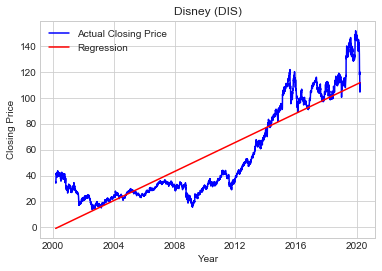

In [20]:
# Plot the 'Close' column to check if there is any irregularities in the data

plt.style.use('seaborn-whitegrid')
plt.plot(dis_data['date'], dis_data['Close'], 'b', label='Actual Closing Price')
plt.plot(dis_data['date'], y, 'r', label='Regression')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Disney (DIS)")
plt.legend()

From the graph above, we can see that if we do linear regression from 2000 to 2020 (red line), it has high Residual Sum of Squares meaning that the model does not fit well with the actual data.

In [21]:
# Calculating the RMSE

rmse = math.sqrt(mean_squared_error(dis_data['Close'], y))
rmse

17.588981852356106

We can try to divide the data into 3 periods of:

1. 2000 - 2012 (Stable)
2. 2012 - 2016 (High Growth)
3. 2016 - 2020 (Growth)

to see if we can have a better model

In [22]:
def new_df(data, start_date, end_date):
    mask = (data['date'] > start_date) & (data['date'] <= end_date)
    data = data.loc[mask]
    return data

In [23]:
stable = new_df(dis_data, '2000-1-1', '2013-1-1')
slope, intercept = np.polyfit(stable['days_since'], stable['Close'],1)
y_stable = slope * dis_data['days_since'] + intercept

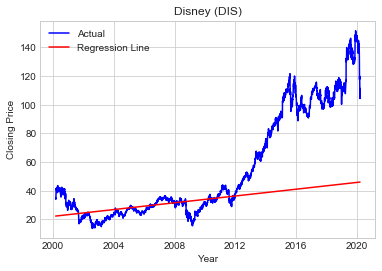

In [24]:
_ = plt.style.use('seaborn-whitegrid')
_ = plt.plot(dis_data['date'], dis_data['Close'], 'b', label='Actual')
_ = plt.plot(dis_data['date'], y_stable, 'r', label='Regression Line')
_ = plt.xlabel("Year")
_ = plt.ylabel("Closing Price")
_ = plt.title("Disney (DIS)")
_ = plt.legend()

In [25]:
dis_data['Delta_Open_Close'] = dis_data.apply(lambda row: (row.Close - row.Open) / row.Open, axis=1)
dis_data['Delta_High_Low'] = dis_data.apply(lambda row: row.High - row.Low, axis=1)

In [26]:
# Find the starting date, ending date and number of days of data

min_date = min(dis_data['date'])
max_date = max(dis_data['date'])
count_date = len(dis_data['date'])
no_years = relativedelta(max_date, min_date).years

In [27]:
# Print the results

print("The earliest date for Disney data is : " + str(min_date.strftime("%b %d %Y")))
print("The latest date for Disney data is : " + str(max_date.strftime("%b %d %Y")))
print("Number of days of transactions : " + str(count_date) + " days in " + str(no_years) + " years")

The earliest date for Disney data is : Mar 10 2000
The latest date for Disney data is : Mar 11 2020
Number of days of transactions : 5032 days in 20 years


In [28]:
# Check the top stats measure

dis_data.describe()

,Open,High,Low,Close,Volume,days_since,Delta_Open_Close,Delta_High_Low
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03,5032.000000,5032.000000,5032.000000
mean,55.413502,55.901790,54.890829,55.414874,9.242871e+06,3654.177266,0.000455,1.010961
std,36.928983,37.116741,36.678772,36.896168,5.538055e+06,2108.442256,0.015097,0.780799
min,13.800000,14.100000,13.480000,13.770000,1.487900e+06,0.000000,-0.081545,0.000000
25%,27.050000,27.435000,26.767500,27.047500,6.069160e+06,1830.750000,-0.007058,0.520000
50%,35.195000,35.565000,34.900000,35.220000,7.920300e+06,3655.500000,0.000000,0.790000
75%,93.625000,94.232500,92.710000,93.752500,1.079474e+07,5480.250000,0.007716,1.250000
max,152.940000,153.410000,151.150000,151.640000,1.166250e+08,7306.000000,0.126951,13.080000


In [29]:
# Check for any missing data

dis_data.isna().sum()

date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
days_since          0
Delta_Open_Close    0
Delta_High_Low      0
dtype: int64

In [30]:
# Find the high, low

min_close = min(dis_data.Close)
max_close = max(dis_data.Close)
increase = (max_close - min_close) / min_close

In [31]:
# Print the results

print("The lowest closing price for Disney stock is : $" + str(min_close))
print("The highest closing price for Disney stock is : $" + str(max_close))
print("If you invest $100 in Disney stock in " + str(min_date.strftime("%b %d %Y")) + ", it will grow to $" + str(round(100*increase,2)))

The lowest closing price for Disney stock is : $13.77
The highest closing price for Disney stock is : $151.64
If you invest $100 in Disney stock in Mar 10 2000, it will grow to $1001.23


#### Open vs Close

In [32]:
print("Biggest Change in One Day for uptick is " + str(max(round(dis_data['Delta_Open_Close']*100, 2))) 
      + "% and for downtick is -" + str(min(round(dis_data['Delta_Open_Close']*199, 2)) * -1) + "%")

Biggest Change in One Day for uptick is 12.7% and for downtick is -16.23%


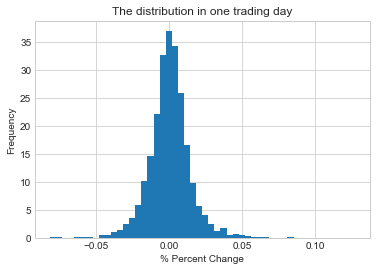

In [33]:
_ = plt.hist(dis_data['Delta_Open_Close'], bins = 50, density=True)
_ = plt.xlabel("% Percent Change")
_ = plt.ylabel("Frequency")
_ = plt.title("The distribution in one trading day")

In [34]:
mu = np.mean(dis_data['Delta_Open_Close'])
sigma = np.std(dis_data['Delta_Open_Close'])

In [35]:
print("From Opening price, Disney stock has an average to change " + str(round(mu*100,2)) + "% with standard deviation of " 
      + str(round(sigma*100, 2)) + "% to Closing price")

From Opening price, Disney stock has an average to change 0.05% with standard deviation of 1.51% to Closing price


#### Trading Days

In [36]:
def next_trad_day_delta(data):
    delta_change = []
    for i in range(len(data) - 1):
        change = (data[i+1] - data[i]) / data[i]
        delta_change.append(change)
    
    return delta_change

In [37]:
dis_delta_change = next_trad_day_delta(dis_data.Close)

In [38]:
print("Biggest uptick change in between two trading days is " + str(round(max(dis_delta_change)*100, 2)) 
      + "% and for downtick is -" + str(round(min(dis_delta_change)*100, 2) * -1) + "%")

Biggest uptick change in between two trading days is 15.97% and for downtick is -18.36%


In [39]:
mu_delta = np.mean(dis_delta_change)
sigma_delta = np.std(dis_delta_change)

In [40]:
print("In average, Disney stock has an average to increase " + str(round(mu_delta*100,2)) + "% with standard deviation of " 
      + str(round(sigma_delta*100, 2)) + "% to the previous day")

In average, Disney stock has an average to increase 0.04% with standard deviation of 1.84% to the previous day


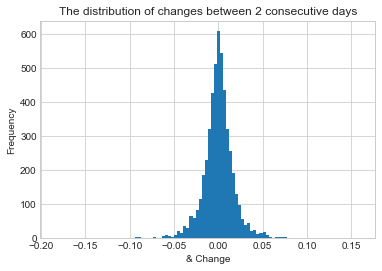

In [41]:
_ = plt.hist(dis_delta_change, bins = 100)
_ = plt.xlabel("& Change")
_ = plt.ylabel("Frequency")
_ = plt.title("The distribution of changes between 2 consecutive days")

#### By period

In [42]:
def find_change(data, delta):
    biggest_change = 0
    smallest_change = max(data) - min(data)
    
    for i in range(len(data) - delta):
        change = data[i+delta] - data[i]
        if change > biggest_change:
            biggest_change = change
        elif change < smallest_change:
            smallest_change = change
        else: next
            
    return np.array([delta, smallest_change, biggest_change])

In [43]:
def create_summary(data):
    
    summary = pd.DataFrame(columns = ['Days Delta', 'Biggest Drop', 'Biggest Increase'])
    
    for i in [1, 5, 10, 20, 253]:
        array_ = find_change(data, i)
        summary.loc[len(summary)] = array_
        
    return summary

In [44]:
disney_summary = create_summary(dis_data.Close)
disney_summary

,Days Delta,Biggest Drop,Biggest Increase
0,1.0,-11.16,13.46
1,5.0,-22.33,17.45
2,10.0,-28.66,23.32
3,20.0,-36.67,29.21
4,253.0,-26.53,45.35


In [45]:
disney_summary.set_index('Days Delta')

,Biggest Drop,Biggest Increase
Days Delta,,
1.0,-11.16,13.46
5.0,-22.33,17.45
10.0,-28.66,23.32
20.0,-36.67,29.21
253.0,-26.53,45.35


## Predicting Stocks

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
def status_calc(stock, sp500, outperformance):
    """A simple function to classify whether a stock outperformed the S&P500
    :param stock: stock price
    :param sp500: S&P500 price
    :param outperformance: stock is classified 1 if stock price > S&P500 price + outperformance
    :return: true/false
    """
    if outperformance < 0:
        raise ValueError("outperformance must be positive")
    
    return stock - sp500 >= outperformance

In [48]:
disney = pd.read_csv("Disney 2000-2020.csv", index_col='date')
features = disney.columns[4:]
disney_ = disney[['Close']].copy()
disney_['Change'] = disney_.pct_change()
#disney_ = disney_.iloc[1:]
disney_.head()

,Close,Change
date,,
1/3/2000,29.88,NaN
1/4/2000,31.63,0.058568
1/5/2000,32.75,0.035409
1/6/2000,31.63,-0.034198
1/7/2000,31.13,-0.015808


In [49]:
sp500 = pd.read_csv("SP500.csv", index_col='Date')
sp500_ = sp500[[' Close']].copy()
sp500_['Change'] = sp500_.pct_change()
#sp500_ = sp500_.iloc[1:]
sp500_.head()

,Close,Change
Date,,
1/3/2000,1455.22,NaN
1/4/2000,1399.42,-0.038345
1/5/2000,1402.11,0.001922
1/6/2000,1403.45,0.000956
1/7/2000,1441.47,0.027090


In [50]:
features

Index(['Volume', 'Federal Funds Rate', 'Euro FX'], dtype='object')

In [51]:
x_test_data = pd.read_csv("Disney 2020-03-10.csv", index_col='date')
x_test_data_ = x_test_data[['Close']].copy()
x_test_data_['Change'] = x_test_data_.pct_change()

y_test_data = pd.read_csv("SP500 2020.csv", index_col='Date')
y_test_data_ = y_test_data[[' Close']].copy()
y_test_data_['Change'] = y_test_data_.pct_change()

In [52]:
X_train = disney[features].values
y_train = status_calc(disney_.Change, sp500_.Change, 0.01)

In [53]:
X_test = x_test_data[features].values
y_test = status_calc(x_test_data_.Change, y_test_data_.Change, 0.01)

In [54]:
def algorithm(estimator, X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(n_estimators=estimator, random_state=0)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    trans = sum(y_pred)
    return results.append({'Estimator': estimator, 'Accuracy': accuracy, 'Transactions': trans})

In [55]:
estimators = [1, 2, 3, 4, 5, 10, 50, 100, 200, 500]
results = []

for estimator in estimators:
    algorithm(estimator, X_train, y_train, X_test, y_test)

In [56]:
result = pd.DataFrame(results)
result.set_index('Estimator')

,Accuracy,Transactions
Estimator,,
1,0.829787,12
2,0.808511,5
3,0.787234,8
4,0.787234,6
5,0.787234,6
10,0.808511,9
50,0.765957,11
100,0.765957,11
200,0.765957,11


In [57]:
# For n = 10

clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

In [58]:
dates = x_test_data.index

In [59]:
df_result = pd.DataFrame({'Date': dates, 'Trades': y_pred})
df_result = df_result.set_index('Date')
df_result[df_result.Trades]

,Trades
Date,
1/14/2020,True
2/4/2020,True
2/24/2020,True
2/25/2020,True
3/2/2020,True
3/3/2020,True
3/5/2020,True
3/6/2020,True
3/10/2020,True
